# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 34

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
156,Butland,Crystal Palace,44,6.0,19,26.726999,3.2,4.454500,NaN,16.955538,2.123599
129,Arrizabalaga,Chelsea,45,4.0,19,17.253834,4.8,4.313459,NaN,19.451514,2.033384
80,Raya,Brentford,43,20.0,83,77.387376,4.2,3.869369,4.286798,15.227307,1.865975
448,Gunn,Norwich City,40,7.0,26,25.941646,3.7,3.705949,NaN,16.488974,1.852975
146,Guaita,Crystal Palace,46,28.0,107,103.059326,3.8,3.680690,4.355408,21.432219,1.716131
559,Ramsdale,Arsenal,51,29.0,125,111.727420,4.3,3.852670,3.132640,19.429911,1.705991
231,Alisson,Liverpool,60,31.0,157,128.732849,5.1,4.152673,4.073864,18.597799,1.695321
408,Fabianski,West Ham,50,33.0,118,124.828952,3.6,3.782696,4.220707,14.341660,1.691673
475,Sá,Wolves,53,33.0,140,127.969739,4.2,3.877871,3.280989,21.599094,1.684439


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,37.051752,9.0,6.175292,NaN,25.376520,2.609537
360,Doherty,Tottenham,46,15.0,67,72.227265,4.5,4.815151,5.849176,20.993833,2.245076
237,Alexander-Arnold,Liverpool,84,29.0,202,181.867924,7.0,6.271308,4.680112,36.974303,2.163807
256,Cancelo,Manchester City,71,31.0,180,177.702456,5.8,5.732337,5.516827,20.290058,2.151308
245,Tsimikas,Liverpool,37,10.0,38,41.371629,3.8,4.137163,NaN,13.975809,2.150809
122,Alonso,Chelsea,56,24.0,111,117.978007,4.6,4.915750,6.599245,22.957652,2.077284
142,James,Chelsea,64,21.0,112,105.358631,5.3,5.017078,1.949964,22.826577,1.983174
252,Stones,Manchester City,52,13.0,69,58.600804,5.3,4.507754,3.975417,15.323630,1.976781
370,Reguilón,Tottenham,51,25.0,104,110.371108,4.2,4.414844,4.262061,19.936784,1.954926


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.263370,6.5,6.315842,NaN,17.702636,2.440023
233,Salah,Liverpool,133,31.0,255,235.904462,8.2,7.609821,6.359216,32.157582,2.086645
420,Bowen,West Ham,69,32.0,171,161.037382,5.3,5.032418,3.911339,15.885886,1.915809
265,Foden,Manchester City,78,24.0,118,124.038217,4.9,5.168259,4.280849,18.832662,1.850534
240,Jota,Liverpool,83,30.0,161,159.852222,5.4,5.328407,5.441466,24.988719,1.849517
681,Coutinho,Aston Villa,70,13.0,66,63.343803,5.1,4.872600,2.891478,23.612716,1.841670
96,Mbeumo,Brentford,52,31.0,110,128.292108,3.5,4.138455,6.358500,16.254402,1.814833
359,Son,Tottenham,110,30.0,204,180.054133,6.8,6.001804,7.598137,36.517263,1.809612
22,Saka,Arsenal,68,33.0,164,153.816352,5.0,4.661102,7.934792,18.408571,1.787451


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
78,Toney,Brentford,69,29.0,129,127.584,4.4,4.399448,4.808400,16.494317,1.674841
315,Pukki,Norwich City,60,32.0,126,122.473,3.9,3.827281,5.567750,19.168593,1.562481
263,Jesus,Manchester City,85,24.0,107,107.988,4.5,4.499500,7.167750,21.182704,1.543316
450,Dennis,Watford,58,31.0,130,111.997,4.2,3.612806,2.917750,18.316435,1.500136
579,Ronaldo,Manchester Utd,122,28.0,151,146.553,5.4,5.234036,7.966667,14.637841,1.498500
357,Kane,Tottenham,125,32.0,154,167.950,4.8,5.248437,5.679400,31.085865,1.484482
413,Antonio,West Ham,74,32.0,122,127.959,3.8,3.998719,3.342750,15.529453,1.469958
177,Calvert-Lewin,Everton,77,13.0,41,52.131,3.2,4.010077,2.090333,20.077756,1.445131
40,Watkins,Aston Villa,74,29.0,100,110.362,3.4,3.805586,4.875000,23.789241,1.398961


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
233,Salah,Liverpool,133,31.0,255,235.904462,8.2,7.609821,32.157582,2.086645
268,Torres,Manchester City,67,4.0,26,25.263370,6.5,6.315842,17.702636,2.440023
237,Alexander-Arnold,Liverpool,84,29.0,202,181.867924,7.0,6.271308,36.974303,2.163807
135,Chilwell,Chelsea,56,6.0,54,37.051752,9.0,6.175292,25.376520,2.609537
359,Son,Tottenham,110,30.0,204,180.054133,6.8,6.001804,36.517263,1.809612
253,Mendy,Manchester City,52,1.0,3,5.892370,3.0,5.892370,17.349721,2.583975
256,Cancelo,Manchester City,71,31.0,180,177.702456,5.8,5.732337,20.290058,2.151308
230,Mané,Liverpool,117,30.0,163,164.852222,5.4,5.495074,22.672161,1.606500
240,Jota,Liverpool,83,30.0,161,159.852222,5.4,5.328407,24.988719,1.849517


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,9.0,6.175292,NaN,25.376520,2.609537
268,Torres,Manchester City,67,4.0,6.5,6.315842,NaN,17.702636,2.440023
360,Doherty,Tottenham,46,15.0,4.5,4.815151,5.849176,20.993833,2.245076
237,Alexander-Arnold,Liverpool,84,29.0,7.0,6.271308,4.680112,36.974303,2.163807
256,Cancelo,Manchester City,71,31.0,5.8,5.732337,5.516827,20.290058,2.151308
245,Tsimikas,Liverpool,37,10.0,3.8,4.137163,NaN,13.975809,2.150809
156,Butland,Crystal Palace,44,6.0,3.2,4.454500,NaN,16.955538,2.123599
233,Salah,Liverpool,133,31.0,8.2,7.609821,6.359216,32.157582,2.086645
122,Alonso,Chelsea,56,24.0,4.6,4.915750,6.599245,22.957652,2.077284


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
233,Salah,Liverpool,133,31.0,255,235.904462,8.2,7.609821,9.742661,32.157582,2.086645
268,Torres,Manchester City,67,4.0,26,25.263370,6.5,6.315842,NaN,17.702636,2.440023
237,Alexander-Arnold,Liverpool,84,29.0,202,181.867924,7.0,6.271308,5.877862,36.974303,2.163807
135,Chilwell,Chelsea,56,6.0,54,37.051752,9.0,6.175292,NaN,25.376520,2.609537
359,Son,Tottenham,110,30.0,204,180.054133,6.8,6.001804,7.547135,36.517263,1.809612
256,Cancelo,Manchester City,71,31.0,180,177.702456,5.8,5.732337,5.518657,20.290058,2.151308
230,Mané,Liverpool,117,30.0,163,164.852222,5.4,5.495074,6.899095,22.672161,1.606500
240,Jota,Liverpool,83,30.0,161,159.852222,5.4,5.328407,3.842677,24.988719,1.849517
251,De Bruyne,Manchester City,119,26.0,158,136.776402,6.1,5.260631,6.037129,21.427151,1.524981


In [25]:
#metric = f'gameweek {gameweek+1} prediction'
metric = 'xPoints_next10'

display(df[midfielders].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
359,Son,Tottenham,110,30.0,204,180.054133,6.8,6.001804,36.517263,1.809612
233,Salah,Liverpool,133,31.0,255,235.904462,8.2,7.609821,32.157582,2.086645
240,Jota,Liverpool,83,30.0,161,159.852222,5.4,5.328407,24.988719,1.849517
212,Maddison,Leicester City,70,31.0,135,122.340181,4.4,3.946457,24.289580,1.491621
215,Barnes,Leicester City,66,27.0,104,101.169577,3.9,3.747021,23.932966,1.458526
138,Mount,Chelsea,77,29.0,153,138.765075,5.3,4.785003,23.907628,1.724395
681,Coutinho,Aston Villa,70,13.0,66,63.343803,5.1,4.872600,23.612716,1.841670
141,Havertz,Chelsea,79,25.0,102,104.255616,4.1,4.170225,22.894484,1.483699
230,Mané,Liverpool,117,30.0,163,164.852222,5.4,5.495074,22.672161,1.606500


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,133,31.0,8.2,7.609821,2.086645,19.9,10.1,30.0,0.967742
579,Ronaldo,Manchester Utd,122,28.0,5.4,5.234036,1.498500,15.4,3.2,18.6,0.664286
357,Kane,Tottenham,125,32.0,4.8,5.248437,1.484482,15.3,8.0,23.3,0.728125
230,Mané,Liverpool,117,30.0,5.4,5.495074,1.606500,15.1,3.9,19.0,0.633333
240,Jota,Liverpool,83,30.0,5.4,5.328407,1.849517,14.6,4.4,19.0,0.633333
359,Son,Tottenham,110,30.0,6.8,6.001804,1.809612,12.2,7.3,19.5,0.650000
255,Sterling,Manchester City,105,26.0,4.9,5.164054,1.593662,11.1,3.8,14.9,0.573077
78,Toney,Brentford,69,29.0,4.4,4.399448,1.674841,10.8,4.9,15.7,0.541379
40,Watkins,Aston Villa,74,29.0,3.4,3.805586,1.398961,10.1,2.3,12.4,0.427586


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 35 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
681,Coutinho,Aston Villa,70,13.0,66,63.343803,5.1,4.8726,4.999233,23.612716,1.84167


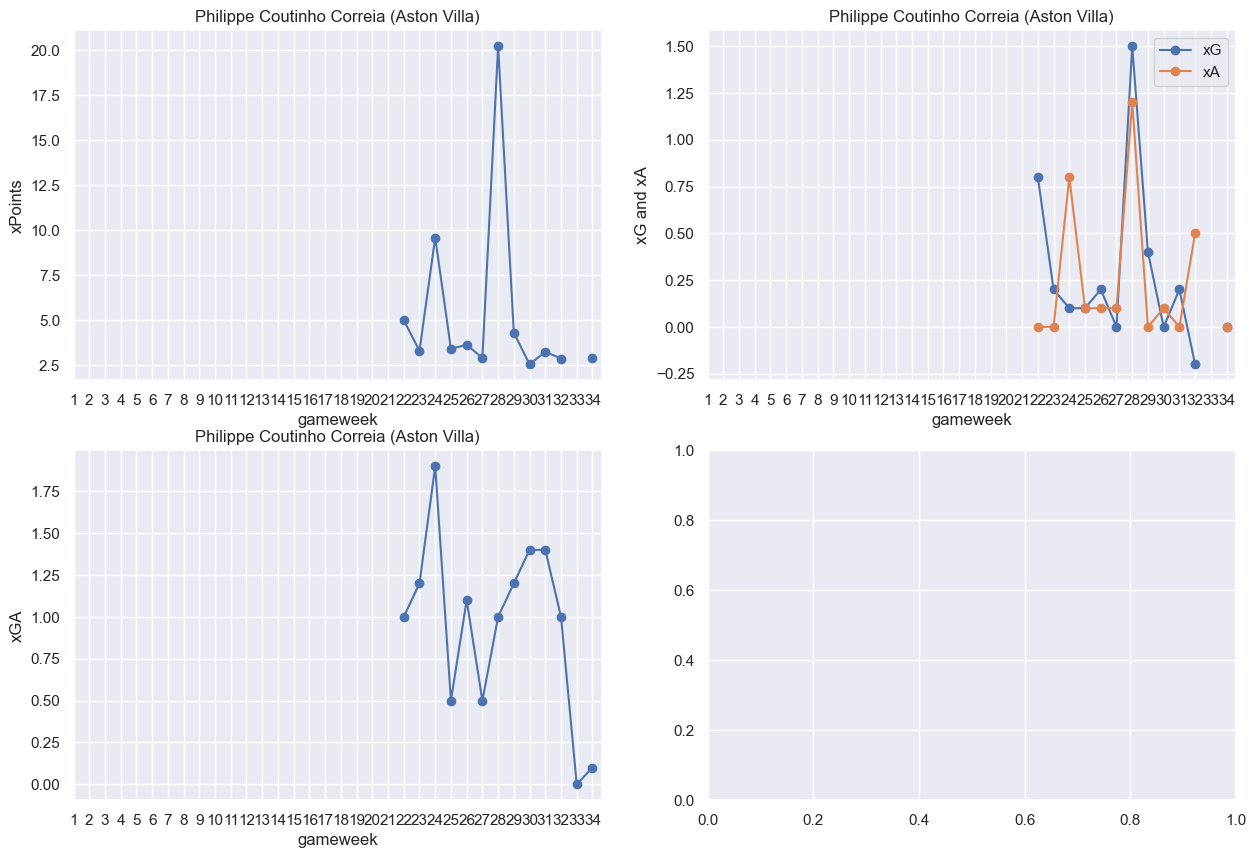

In [24]:
# find player index
name_string = 'Coutinh'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 266

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [27]:
session = requests.session()

In [28]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [29]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 
#"redirect_uri": "https://fantasy.premierleague.com/",
#'redirect_uri': 'https://fantasy.premierleague.com/api/bootstrap-static/',
'app': 'plfpl-web'
}

headers = {
   'authority': 'users.premierleague.com' ,
   'cache-control': 'max-age=0' ,
   'upgrade-insecure-requests': '1' ,
   'origin': 'https://fantasy.premierleague.com' ,
   'content-type': 'application/x-www-form-urlencoded' ,
   'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36' ,
   'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' ,
   'sec-fetch-site': 'same-site' ,
   'sec-fetch-mode': 'navigate' ,
   'sec-fetch-user': '?1' ,
   'sec-fetch-dest': 'document' ,
   'referer': 'https://fantasy.premierleague.com/my-team' ,
   'accept-language': 'en-US,en;q=0.9,he;q=0.8' ,
}

session.post(url, data=payload, headers=headers)

<Response [200]>

In [30]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [31]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [32]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 61.4195867036877
Predicted points next gameweek: 61.196943044662476


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 35 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
333,Forster,Southampton,44,17.0,3.2,3.371019,3.919610,3.914807,3.728113,15.064642,1.607070
142,James,Chelsea,64,21.0,5.3,5.017078,1.949964,3.746411,4.476351,22.826577,1.983174
237,Alexander-Arnold,Liverpool,84,29.0,7.0,6.271308,4.680112,5.877862,8.016706,36.974303,2.163807
256,Cancelo,Manchester City,71,31.0,5.8,5.732337,5.516827,5.518657,3.662222,20.290058,2.151308
122,Alonso,Chelsea,56,24.0,4.6,4.915750,6.599245,5.633596,4.508962,22.957652,2.077284
22,Saka,Arsenal,68,33.0,5.0,4.661102,7.934792,7.404569,3.570423,18.408571,1.787451
51,Ramsey,Aston Villa,47,30.0,3.4,2.983710,2.366478,3.297880,3.402586,17.518545,1.376283
233,Salah,Liverpool,133,31.0,8.2,7.609821,6.359216,9.742661,6.928017,32.157582,2.086645
138,Mount,Chelsea,77,29.0,5.3,4.785003,6.077325,6.594055,4.606516,23.907628,1.724395



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 35 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,22.0,3.0,3.036806,2.080770,2.831898,3.914444,17.760015,1.499772
215,Barnes,Leicester City,66,27.0,3.9,3.747021,3.832768,4.296862,3.234705,23.932966,1.458526
518,Broja,Southampton,55,29.0,3.0,3.077310,2.833333,3.075000,3.186010,12.662817,1.312170
290,Williams,Norwich City,39,24.0,1.5,1.811884,0.700000,1.112573,2.461989,11.362010,0.917483


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)